<a href="https://colab.research.google.com/github/toinnn/Docket_Processo_Seletivo/blob/master/Docket_Processo_Alex_Net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_87 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 activation_145 (Activation)  (None, 148, 148, 32)     0         
                                                                 
 max_pooling2d_87 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_88 (Conv2D)          (None, 74, 74, 32)        9248      
                                                                 
 activation_146 (Activation)  (None, 74, 74, 32)       0         
                                                                 
 max_pooling2d_88 (MaxPoolin  (None, 37, 37, 32)       0         
 g2D)                                                

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:84: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/15
5/5 [==============================] - ETA: 0s - loss: 10.6436 - accuracy: 0.2875 - categorical_accuracy: 0.2875
Epoch 1: val_accuracy improved from -inf to 0.18750, saving model to /content/drive/MyDrive/Github_Dir/Docket_Processo/Dataset/Simplest/model_5.h5
5/5 [==============================] - 10s 2s/step - loss: 10.6436 - accuracy: 0.2875 - categorical_accuracy: 0.2875 - val_loss: 7.8938 - val_accuracy: 0.1875 - val_categorical_accuracy: 0.1875
Epoch 2/15
5/5 [==============================] - ETA: 0s - loss: 6.4609 - accuracy: 0.3000 - categorical_accuracy: 0.3000
Epoch 2: val_accuracy improved from 0.18750 to 0.56250, saving model to /content/drive/MyDrive/Github_Dir/Docket_Processo/Dataset/Simplest/model_5.h5
5/5 [==============================] - 8s 1s/step - loss: 6.4609 - accuracy: 0.3000 - categorical_accuracy: 0.3000 - val_loss: 1.4741 - val_accuracy: 0.5625 - val_categorical_accuracy: 0.5625
Epoch 3/15
5/5 [==============================] - ETA: 0s - loss: 1.70

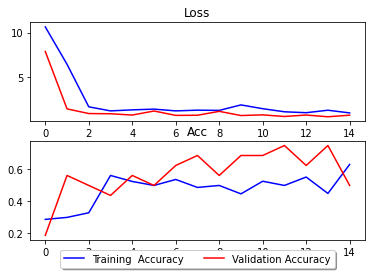

In [51]:
from keras import callbacks
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt


train_Path = "/content/drive/MyDrive/Github_Dir/Docket_Processo/Dataset/Simplest/Train"
test_Path  = "/content/drive/MyDrive/Github_Dir/Docket_Processo/Dataset/Simplest/Test"


model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=( 150, 150 , 3) ))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2) , padding = 'same' ))

model.add(Conv2D(32, (3, 3) , padding = 'same'))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2) , padding ='same'))

model.add(Conv2D(64, (3, 3) , padding = 'same'))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2) , padding = 'same' ))

# the model so far outputs 3D feature maps (height, width, features)

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('elu'))
model.add(Dropout(0.5))
model.add(Dense(3))
model.add(Activation('softmax'))
model.summary()

model.compile( loss = 'categorical_crossentropy' , optimizer = 'rmsprop' , metrics = ['accuracy' , "categorical_accuracy"] )

tentativa_Número = 5
base_path  = "/content/drive/MyDrive/Github_Dir/Docket_Processo/Dataset/Simplest/"
save_path  = "/content/drive/MyDrive/Github_Dir/Docket_Processo/Dataset/Simplest/" + f"model_{tentativa_Número}.h5"
checkpoint = ModelCheckpoint(filepath = save_path ,
                             monitor  = "val_accuracy",
                             verbose  = 1, 
                             save_best_only=True,
                             mode = "max")

batch_size = 16

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        train_Path ,  # this is the target directory
        target_size=(150, 150) ,  # all images will be resized to 150x150
        batch_size=batch_size )# , class_mode = 'binary' )  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        test_Path ,
        target_size=(150, 150) , batch_size = batch_size  )#class_mode = 'binary')


# print(train_generator)
# print(validation_generator)
model.fit_generator(
        train_generator,
        steps_per_epoch = 83 // batch_size,#2000
        epochs = 15 ,
        validation_data = validation_generator ,
        validation_steps = 21 // batch_size ,
        callbacks = [checkpoint] ,
        shuffle= True )#432

# model.history.history["val_accuracy"]
#Plotting the training and validation loss
# print(model.history.history.keys())
f, ax=plt.subplots(2,1) #Creates 2 subplots under 1 column

#Assigning the first subplot to graph training loss and validation loss
ax[0].plot(model.history.history['loss'],color='b',label='Training Loss')
ax[0].plot(model.history.history['val_loss'],color='r',label='Validation Loss')
ax[0].set_title("Loss")

#Plotting the training accuracy and validation accuracy
ax[1].plot(model.history.history['accuracy'],color='b',label='Training  Accuracy')
ax[1].plot(model.history.history['val_accuracy'],color='r',label='Validation Accuracy')
ax[1].set_title("Acc")

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)        



In [36]:
print()
base_path  = "/content/drive/MyDrive/Github_Dir/Docket_Processo/Dataset/Simplest/"


In [52]:
name = base_path + f"AlexNet{tentativa_Número}_val_acc-{max(model.history.history['val_accuracy'])}"
f.savefig(name+".jpg")
model.save(name+".h5")